# Import libs

In [16]:
from pathlib import Path
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm

import matplotlib.pyplot as plt  # For data viz
import pandas as pd
import numpy as np
import sys
from tqdm.notebook import tqdm


In [17]:
print("System Version:", sys.version)
print("PyTorch version", torch.__version__)
print("Torchvision version", torchvision.__version__)
print("Numpy version", np.__version__)
print("Pandas version", pd.__version__)


System Version: 3.11.6 (tags/v3.11.6:8b6ee5b, Oct  2 2023, 14:57:12) [MSC v.1935 64 bit (AMD64)]
PyTorch version 2.1.2+cpu
Torchvision version 0.16.2+cpu
Numpy version 1.26.3
Pandas version 2.1.4


# Download dataset with Kaggle API

You need an API key to use the Kaggle API.  
Click on your profile picture (top right), go to Settings, Create New Token, then download & open the file.  
Copy the contents, and paste them in the following cell (e.g., creds = '{"username":"xxx","key":"xxx"}'):

In [6]:
# creds = '{"username":"YOUR_USERNAME","key":"YOUR_API_KEY"}'

Then execute this cell (this only needs to be run once) - thanks [Jeremy Howard](https://www.kaggle.com/code/jhoward/getting-started-with-nlp-for-absolute-beginners)!

In [7]:
# for working with paths in Python, I recommend using `pathlib.Path`

# cred_path = Path("~/.kaggle/kaggle.json").expanduser()
# if not cred_path.exists():
#     cred_path.parent.mkdir(exist_ok=True)
#     cred_path.write_text(creds)
#     cred_path.chmod(0o600)




Run this next cell to download the dataset from Kaggle:


In [9]:
# !kaggle datasets download -d gpiosenka/cards-image-datasetclassification


  0%|          | 0.00/385M [00:00<?, ?B/s]
  0%|          | 1.00M/385M [00:00<06:03, 1.11MB/s]
  1%|          | 2.00M/385M [00:01<03:05, 2.17MB/s]
  1%|          | 4.00M/385M [00:01<01:27, 4.56MB/s]
  2%|▏         | 7.00M/385M [00:01<00:46, 8.58MB/s]
  2%|▏         | 9.00M/385M [00:01<00:36, 10.8MB/s]
  3%|▎         | 12.0M/385M [00:01<00:27, 14.0MB/s]
  4%|▎         | 14.0M/385M [00:01<00:31, 12.2MB/s]
  4%|▍         | 17.0M/385M [00:02<00:27, 14.2MB/s]
  5%|▌         | 20.0M/385M [00:02<00:27, 13.9MB/s]
  6%|▌         | 22.0M/385M [00:02<00:26, 14.2MB/s]
  7%|▋         | 26.0M/385M [00:02<00:22, 17.0MB/s]
  7%|▋         | 28.0M/385M [00:02<00:24, 15.2MB/s]
  8%|▊         | 30.0M/385M [00:02<00:26, 14.1MB/s]
  8%|▊         | 32.0M/385M [00:03<00:25, 14.3MB/s]
  9%|▉         | 35.0M/385M [00:03<00:23, 15.6MB/s]
 10%|▉         | 37.0M/385M [00:03<00:24, 14.8MB/s]
 11%|█         | 41.0M/385M [00:03<00:20, 18.0MB/s]
 11%|█         | 43.0M/385M [00:03<00:20, 17.9MB/s]
 12%|█▏        | 45.

The API command above can be obtained by clicking the three black dots and selecting `Copy API command`:   
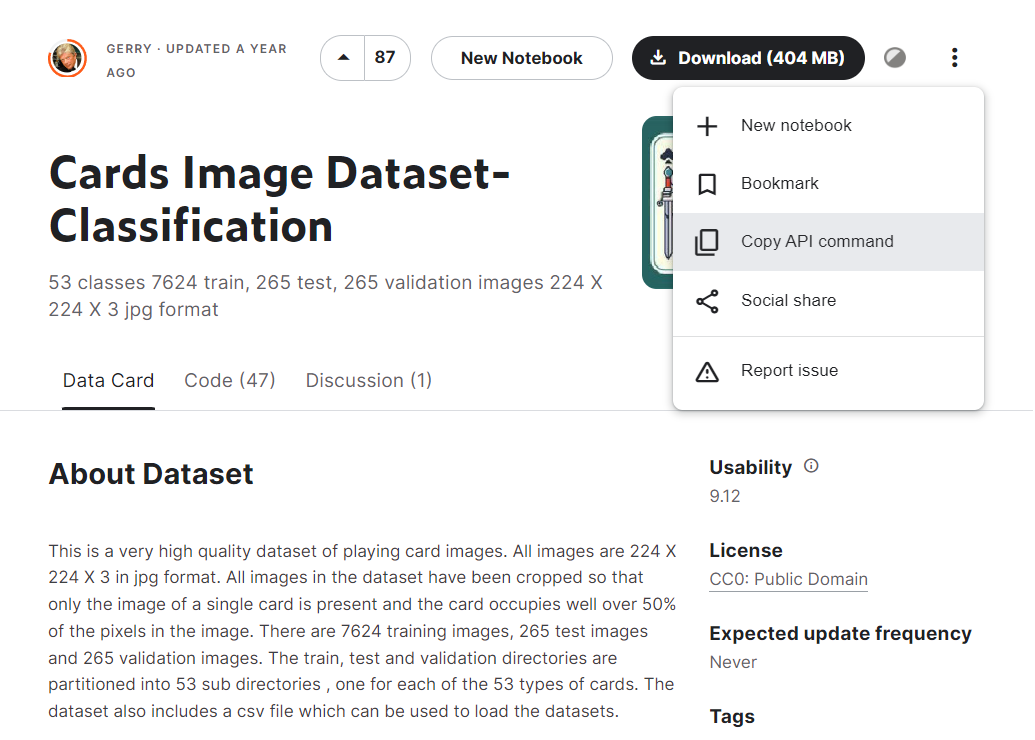

# Step 1. Pytorch Dataset (and Dataloader)

In [20]:
class PlayingCardDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data = ImageFolder(data_dir, transform=transform)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index]

    @property
    def classes(self):
        return self.data.classes


## Create test dataset

In [22]:
dataset = PlayingCardDataset(data_dir="./input/train/")

In [23]:
dataset